In [174]:
import pandas as pd

In [117]:
df = pd.read_csv('/content/vaccination_all_tweets.csv')

In [119]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27809 entries, 0 to 27808
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27809 non-null  int64 
 1   user_name         27809 non-null  object
 2   user_location     21363 non-null  object
 3   user_description  25863 non-null  object
 4   user_created      27809 non-null  object
 5   user_followers    27809 non-null  int64 
 6   user_friends      27809 non-null  int64 
 7   user_favourites   27809 non-null  int64 
 8   user_verified     27809 non-null  bool  
 9   date              27809 non-null  object
 10  text              27809 non-null  object
 11  hashtags          21946 non-null  object
 12  source            27794 non-null  object
 13  retweets          27809 non-null  int64 
 14  favorites         27809 non-null  int64 
 15  is_retweet        27809 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.0+ MB


In [121]:
df.isnull().sum()

id                     0
user_name              0
user_location       6446
user_description    1946
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5863
source                15
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [122]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [123]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)

In [124]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [125]:
print(text_df.text.iloc[0],"\n")
print(text_df.text.iloc[1],"\n")
print(text_df.text.iloc[2],"\n")
print(text_df.text.iloc[3],"\n")
print(text_df.text.iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [126]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27809 entries, 0 to 27808
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27809 non-null  object
dtypes: object(1)
memory usage: 217.4+ KB


In [127]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
from textblob import TextBlob

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))



In [129]:
import re
def data_preprocessing(text):
  text = text.lower()

  text = re.sub(r"https\S+ |www \S+https\S+","",text,flags=re.MULTILINE)
  text = re.sub(r"\@w+|\#",'',text)
  text = re.sub(r'[^\w\s]','',text)

  text_token = word_tokenize(text) 
  filter_text = [w for w in text_token if not w in stop_words]

  return " ".join(filter_text)

In [130]:
text_df.text = text_df['text'].apply(data_preprocessing)

In [131]:
print(text_df.text.iloc[0],"\n")
print(text_df.text.iloc[1],"\n")
print(text_df.text.iloc[2],"\n")
print(text_df.text.iloc[3],"\n")
print(text_df.text.iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech httpstcoxehhimg1kf 

world wrong side history year hopefully biggest vaccination effort weve ev httpstcodlchrzjkhm 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years httpstcoieylckbr8p 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born httpstcojqgv18kch4 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech httpstcokxbsrobehq 



In [132]:
text_df = text_df.drop_duplicates("text")

In [143]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(data):
  text = [stemmer.stem(word) for word in data.split()]
  return " ".join(text)

In [144]:
text_df['text_new'] = text_df['text'].apply(stemming)

In [147]:
def polarity(text):
  return TextBlob(text).sentiment.polarity

text_df['polarity'] = text_df['text_new'].apply(polarity)

In [148]:
text_df.head()

,text,text_new,polarity
0,folks said daikon paste could treat cytokine s...,folk said daikon past could treat cytokin stor...,-0.25
1,world wrong side history year hopefully bigges...,world wrong side histori year hope biggest vac...,-0.50
2,coronavirus sputnikv astrazeneca pfizerbiontec...,coronaviru sputnikv astrazeneca pfizerbiontech...,0.00
3,facts immutable senator even youre ethically s...,fact immut senat even your ethic sturdi enough...,0.00
4,explain need vaccine borisjohnson matthancock ...,explain need vaccin borisjohnson matthancock w...,0.00


# Labeling

In [149]:
def sentiment(label):
  if label<0:
    return "Negative"
  elif label==0:
    return "Neutral"
  else:
    return "Positive"

text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

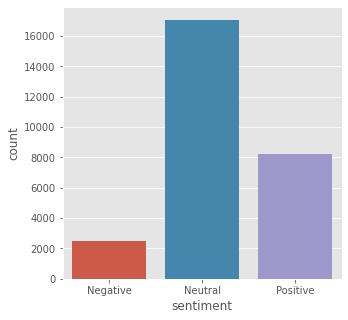

In [153]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x = 'sentiment',data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

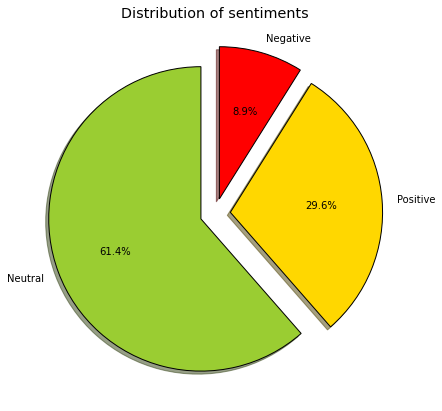

In [160]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':1, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [161]:
pos_tweet = text_df[text_df['sentiment']=='Positive']
pos_tweets = pos_tweet.sort_values(['polarity'],ascending = False)
pos_tweets.head()

,text,text_new,polarity,sentiment
25917,got parents vaccinated today mrityunnjayhos1 a...,got parent vaccin today mrityunnjayhos1 amaz e...,1.0,Positive
18530,geetv79 idea modi politically really dont know...,geetv79 idea modi polit realli dont know know ...,1.0,Positive
18023,vaccinated remember best vaccine vaccine arm l...,vaccin rememb best vaccin vaccin arm lamangang...,1.0,Positive
26708,abineshmkr ocugen covaxin believe covaxin safe...,abineshmkr ocugen covaxin believ covaxin safes...,1.0,Positive
26707,ervisfusha ocugen covaxin best world httpstcos...,ervisfusha ocugen covaxin best world httpstcos...,1.0,Positive


In [164]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text_new'])

In [165]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 211170

First 20 features:
 ['000', '000 000the', '000 belgium', '000 death', '000 donat', '000 dose', '000 health', '000 initi', '000 peopl', '000 share', '000 sinopharm', '000 vaccin', '0001', '0001 risk', '000the', '000the standard', '004', '004 covid', '004 isra', '005']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [166]:
X = text_df['text_new']
Y = text_df['sentiment']
X = vect.transform(X)

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [170]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (22211, 211170)
Size of y_train: (22211,)
Size of x_test: (5553, 211170)
Size of y_test: (5553,)


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.86%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
